In [1]:
# 1
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

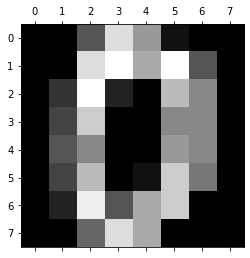

In [2]:
# 1.a 
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [3]:
# 3 - make model
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

data, target = load_digits(return_X_y=True)
#NCA
#Pipeline, Do this, then that, then this.
model = make_pipeline(
    StandardScaler(), 
    NeighborhoodComponentsAnalysis(n_components=2, 
    random_state=0))

In [4]:
# 3 - train model

model.fit(data, target)
# model.transform converts the 64 dimensions of the dataset, down to 2 dimensions.
# The n_components of the "NeighborhoodComponentsAnalysis" is what dimensions the transform converts the dimensions to.
data_embedded = model.transform(data)

In [5]:
# 3 - check accuracy of the data dimensionality reduction
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=1)

# Use a nearest neighbor classifier to evaluate the methods
# Majority voting system - n_neighbors=K of the closest. e.g. (Dog, Cat, Lion, Girafe, Dog) <- Most dogs, therfore it must be a dog.
knn = KNeighborsClassifier(n_neighbors=5)

# Fit a nearest neighbor classifier on the embedded training set
knn.fit(model.transform(X_train), y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(model.transform(X_test), y_test)

print(acc_knn)

0.8422222222222222


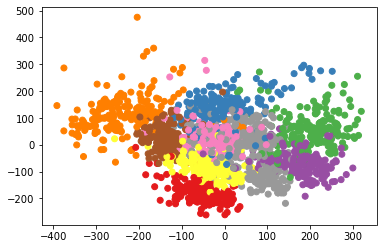

In [6]:
# 3 - show scatterplot

plt.figure()
# data_embedded[:,0] <= All rows for column 1 - AKA X axis
# data_embedded[:, 1] <= All rows for column 2 - AKA Y axis
# cmap = "Set1" <= Color map, Gives us colors on the plot.
plt.scatter(data_embedded[:,0], data_embedded[:, 1], c=target, cmap='Set1')
plt.show()

In [7]:
# 4
from sklearn.cluster import MeanShift
analyzer = MeanShift(bandwidth=80) 
analyzer.fit(data_embedded)

MeanShift(bandwidth=80, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [8]:
# 4.a
# Our analyzer found just as many clusters as the diagram up above.
import numpy as np
clusters = analyzer.labels_
print(np.unique(clusters))

[0 1 2 3 4 5 6 7 8]


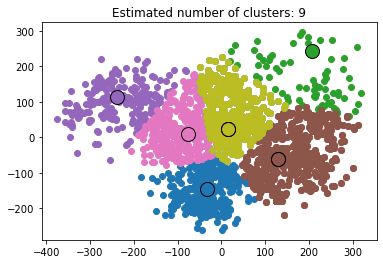

In [9]:
# Plot result
colors = "tab:blue tab:orange tab:green tab:red tab:purple tab:brown tab:pink tab:cyan tab:olive".split()
for k, col in zip(clusters, colors):
    picture = clusters == k
    cluster_center = analyzer.cluster_centers_[k]
    #Scatter plot
    plt.scatter(data_embedded[picture, 0], data_embedded[picture, 1], c=col)
    #Plots the centers
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % len(analyzer.cluster_centers_))
plt.show()